In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

## Import data

In [3]:
data = pd.read_json('../raw_data/news_category_data.json', lines=True)

In [4]:
data[data.category == 'IMPACT']

,category,headline,authors,link,short_description,date
12,IMPACT,"With Its Way Of Life At Risk, This Remote Oyst...",Karen Pinchin,https://www.huffingtonpost.com/entry/remote-oy...,The revolution is coming to rural New Brunswick.,2018-05-26
66,IMPACT,Monsanto And Bayer Are Set To Merge. Here's Wh...,"Arthur Neslen, On Assignment For HuffPost",https://www.huffingtonpost.com/entry/monsanto-...,“Together they will influence markets all over...,2018-05-25
125,IMPACT,You're Going To Use That Self-Checkout Machine...,Dave Jamieson,https://www.huffingtonpost.com/entry/youre-goi...,"We may not realize it, but retailers are condi...",2018-05-24
193,IMPACT,Machines Don't Always Steal Our Jobs. Increasi...,"Mark Harris, On assignment for HuffPost",https://www.huffingtonpost.com/entry/jobs-robo...,Your next boss could be an algorithm,2018-05-23
286,IMPACT,She Started A Suicide Prevention Site At Age 1...,Lauren Rearick,https://www.huffingtonpost.com/entry/buddy-pro...,“People didn’t view me seriously because I was...,2018-05-21
...,...,...,...,...,...,...
200762,IMPACT,"Texana Hollis, 101-Year-Old Evicted Detroit Wo...",,https://www.huffingtonpost.com/entry/texana-ho...,A local contracting company offered to install...,2012-01-29
200763,IMPACT,"Malaria's Defeat, Africa's Future","Ellen Johnson-Sirleaf, Contributor\nPresident ...",https://www.huffingtonpost.com/entry/malarias-...,Africa is taking command of its future by tack...,2012-01-29
200825,IMPACT,Tinker and Change the World,"Larry Bock, Contributor\nFounder and Organizer...",https://www.huffingtonpost.com/entry/hands-on-...,"Tinkering -- that hands-on, garage-based tradi...",2012-01-28
200826,IMPACT,Pregnant and Displaced: Double the Danger,"Sarah Costa, Contributor\nExecutive Director o...",https://www.huffingtonpost.com/entry/maternal-...,It's time we all step up our efforts to ensure...,2012-01-28


In [5]:
list(data.category.unique())

['CRIME',
 'ENTERTAINMENT',
 'WORLD NEWS',
 'IMPACT',
 'POLITICS',
 'WEIRD NEWS',
 'BLACK VOICES',
 'WOMEN',
 'COMEDY',
 'QUEER VOICES',
 'SPORTS',
 'BUSINESS',
 'TRAVEL',
 'MEDIA',
 'TECH',
 'RELIGION',
 'SCIENCE',
 'LATINO VOICES',
 'EDUCATION',
 'COLLEGE',
 'PARENTS',
 'ARTS & CULTURE',
 'STYLE',
 'GREEN',
 'TASTE',
 'HEALTHY LIVING',
 'THE WORLDPOST',
 'GOOD NEWS',
 'WORLDPOST',
 'FIFTY',
 'ARTS',
 'WELLNESS',
 'PARENTING',
 'HOME & LIVING',
 'STYLE & BEAUTY',
 'DIVORCE',
 'WEDDINGS',
 'FOOD & DRINK',
 'MONEY',
 'ENVIRONMENT',
 'CULTURE & ARTS']

In [6]:
data[data.category == 'ENVIRONMENT']

,category,headline,authors,link,short_description,date
125421,ENVIRONMENT,Sky Vets Perform Incredible Rescue To Save Wil...,Brianna Elliott,https://www.huffingtonpost.com/entry/skyvetts-...,Warning: This video contains graphic images of...,2014-04-13
125422,ENVIRONMENT,Animal Photos Of The Week: Baby Panda Goes For...,,https://www.huffingtonpost.com/entry/animal-ph...,This week has been an interesting one in the w...,2014-04-13
125423,ENVIRONMENT,Washington Mudslide Menacing Fabled Pacific No...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/washingto...,"The tribe - whose name means ""the river people...",2014-04-13
125424,ENVIRONMENT,America's Exotic Pet Obsession Is Out Of Contr...,Brianna Elliott,https://www.huffingtonpost.com/entry/americas-...,Nearly two-thirds of Americans own at least on...,2014-04-13
125494,ENVIRONMENT,Time to Leave Our Bad Carbon Boyfriend,"Bob Brinkmann, Contributor\nProfessor of Geolo...",https://www.huffingtonpost.com/entry/carbon-cl...,But break-ups happen all the time and we find ...,2014-04-12
...,...,...,...,...,...,...
200828,ENVIRONMENT,Boxer Puppy And Cows Make Friends During Walk ...,,https://www.huffingtonpost.com/entry/boxer-pup...,This bevy of otters were also filmed having a ...,2012-01-28
200829,ENVIRONMENT,'Black Smoker' Vents: New Species Discovered N...,,https://www.huffingtonpost.com/entry/black-smo...,Photos and captions courtesy of University of ...,2012-01-28
200830,ENVIRONMENT,Green Activists: 50 And Older,,https://www.huffingtonpost.com/entry/green-peo...,If you look at some of today's most prominent ...,2012-01-28
200831,ENVIRONMENT,Winter Weather Photo Contest: Submit Your Own ...,,https://www.huffingtonpost.com/entry/winter-we...,While severe winter weather has devastated som...,2012-01-28


## Clean data

### Categories remapping

In [7]:
my_dict = {'CRIME': 'Crime',
 'ENTERTAINMENT': 'Entertainment',
 'WORLD NEWS': 'World News',
 'IMPACT': 'Other',
 'POLITICS': 'Politics',
 'WEIRD NEWS': 'Other',
 'BLACK VOICES': 'Activism',
 'WOMEN': 'Entertainment',
 'COMEDY': 'Entertainment',
 'QUEER VOICES': 'Activism',
 'SPORTS': 'Sports',
 'BUSINESS': 'Business',
 'TRAVEL': 'Culture',
 'MEDIA': 'Media',
 'TECH': 'Technology',
 'RELIGION': 'Religion',
 'SCIENCE': 'Science',
 'LATINO VOICES': 'Activism',
 'EDUCATION': 'Education',
 'COLLEGE': 'Education',
 'PARENTS': 'Other',
 'ARTS & CULTURE': 'Culture',
 'STYLE': 'Trends',
 'GREEN': 'Activism',
 'TASTE': 'Culture',
 'HEALTHY LIVING': 'Health',
 'THE WORLDPOST': 'World News',
 'GOOD NEWS': 'Other',
 'WORLDPOST': 'World News',
 'FIFTY': 'Other',
 'ARTS': 'Culture',
 'WELLNESS': 'Health',
 'PARENTING': 'Other',
 'HOME & LIVING': 'Trends',
 'STYLE & BEAUTY': 'Trends',
 'DIVORCE': 'Other',
 'WEDDINGS': 'Other',
 'FOOD & DRINK': 'Culture',
 'MONEY': 'Other',
 'ENVIRONMENT': 'Activism',
 'CULTURE & ARTS': 'Culture'}

In [8]:
len(set(my_dict.values()))

16

### cleaning data

In [142]:
merged_data = pd.read_csv('../big_picture/data/all_data_12k_merged_cols.csv')

In [199]:
clean_data = data
#clean_data = merged_data.iloc[:, 3:]

In [200]:
new_data = clean_data.copy()
new_data['category'] = clean_data.category.map(lambda x: my_dict[x])

In [186]:
new_data = new_data[new_data['content'] != 'Invalid file'].reset_index().drop(columns='index')

In [202]:
len(new_data)

200853

In [203]:
new_data.category.value_counts()

Politics         32739
Other            30344
Entertainment    24723
Health           24521
Culture          22087
Trends           16098
Activism         15916
World News        8420
Business          5937
Sports            4884
Crime             3405
Media             2815
Religion          2556
Science           2178
Education         2148
Technology        2082
Name: category, dtype: int64

In [11]:
new_data.to_csv('../big_picture/data/data_topics.csv')

In [204]:
example = new_data.iloc[:,:]
y_example = new_data.iloc[:,0]

In [205]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

y = ohe.fit_transform(pd.DataFrame(y_example)).toarray()
y.shape

(200853, 16)

In [226]:
val_dict = {}

for idx, val in enumerate(ohe.categories_[0]):
    print(idx, val)
    val_dict[val] = int(idx)

0 Activism
1 Business
2 Crime
3 Culture
4 Education
5 Entertainment
6 Health
7 Media
8 Other
9 Politics
10 Religion
11 Science
12 Sports
13 Technology
14 Trends
15 World News


In [232]:
# To complete
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(300, activation='relu', input_dim=embeddings.shape[1]))
    
    model.add(layers.Dense(600, activation='relu'))
    
    model.add(layers.Dense(200, activation='relu'))
    
    model.add(layers.Dense(50, activation='relu'))
    
    model.add(layers.Dense(16, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [191]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(new_data.news_all_data, show_progress_bar=True)

Batches:   0%|          | 0/352 [00:00<?, ?it/s]

AttributeError: 'float' object has no attribute 'strip'

In [59]:
embeddings.shape, y_example.shape

((50000, 768), (50000,))

In [192]:
embeddings_200k = pd.read_csv('../big_picture/data/embeddings_200k.csv')

In [233]:
model = initialize_model()
#embeddings_200k = embeddings_200k.drop(columns='Unnamed: 0')
embeddings_200k

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.556587,-1.730802,0.565383,0.147426,-0.014432,-0.404302,-0.217101,-0.386556,0.452206,1.035194,...,-0.104107,0.873444,0.321066,1.288373,0.182126,-0.084114,-0.205512,-0.034212,0.356344,-0.120589
1,0.420517,0.315536,0.600557,-0.438315,-0.295465,-0.373603,0.222069,-0.523006,1.455598,-0.317190,...,0.074225,-0.834088,0.216602,0.820604,0.360761,0.244211,0.142351,0.626780,-0.310830,-0.820157
2,-0.213008,-0.831775,0.318774,-0.510296,-0.321338,-1.113930,0.169799,-0.350170,-0.028248,0.239748,...,-0.347566,-0.848967,1.017001,0.384794,-0.122068,-0.858027,0.074009,-0.777332,-0.044370,-0.005434
3,-0.331016,0.028823,-0.067903,-1.094421,-1.116765,-0.424198,-0.247861,0.491398,1.089847,-1.060441,...,-0.346633,0.559534,-1.272676,1.694678,0.189955,-0.056552,0.082049,-0.059729,0.273527,-0.356776
4,-0.863933,-0.043071,0.273481,-0.737110,-0.241176,-0.027584,-0.312297,-0.050383,0.203471,0.606433,...,-1.224242,0.212249,-1.223779,0.090633,-0.152032,-0.568693,0.171142,-0.451859,0.057632,0.431622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200848,-1.102570,-0.354107,0.119313,-1.576579,-0.017725,-0.855054,0.947966,0.429000,0.492465,-0.414553,...,-0.173267,-0.731688,-0.353631,0.315879,0.640798,0.529474,0.113282,0.059109,-0.253340,-0.188106
200849,-0.532881,-0.593179,0.556835,-0.762534,-0.687641,-0.610300,-0.360306,0.148103,0.705661,0.425132,...,-0.284688,-0.397910,-0.507344,0.324770,0.043224,-0.739184,-0.799036,-0.414117,0.541927,-0.406548
200850,-0.009099,-0.431355,-0.024914,-0.295087,-0.668326,-0.086673,-0.513776,-0.497617,0.294848,0.326768,...,-0.808323,0.643555,0.074096,0.296579,0.077952,-0.466608,0.104668,-0.880044,0.597700,-0.689383
200851,-0.093480,-1.100077,-0.535262,-0.344463,-0.022475,-0.427429,0.050615,-0.148834,0.114921,-0.042271,...,-0.875505,0.759278,-0.496298,1.150534,-0.149261,-0.616003,-0.017094,-0.261166,0.872171,-1.047837


In [134]:
from sentence_transformers import SentenceTransformer
model_1 = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model_1.encode(example.headline, show_progress_bar=True)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [137]:
model_1.tokenizer.get_vocab

<bound method PreTrainedTokenizerFast.get_vocab of PreTrainedTokenizerFast(name_or_path='/Users/josefreitas/.cache/torch/sentence_transformers/sbert.net_models_distilbert-base-nli-mean-tokens/0_Transformer', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})>

In [234]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10)

history = model.fit(embeddings_200k,
                    y,
                    epochs=20,
                    validation_split=0.3,
                    batch_size=32,
                    callbacks=[es],
                    verbose=1
                    )

Epoch 1/20
4394/4394 [==============================] - 15s 3ms/step - loss: 1.5223 - accuracy: 0.5270 - val_loss: 1.3556 - val_accuracy: 0.5873
Epoch 2/20
4394/4394 [==============================] - 17s 4ms/step - loss: 1.2389 - accuracy: 0.6102 - val_loss: 1.3121 - val_accuracy: 0.5976
Epoch 3/20
4394/4394 [==============================] - 20s 4ms/step - loss: 1.1806 - accuracy: 0.6222 - val_loss: 1.3246 - val_accuracy: 0.5812
Epoch 4/20
4394/4394 [==============================] - 18s 4ms/step - loss: 1.1292 - accuracy: 0.6366 - val_loss: 1.3170 - val_accuracy: 0.5979
Epoch 5/20
4394/4394 [==============================] - 17s 4ms/step - loss: 1.0930 - accuracy: 0.6458 - val_loss: 1.3065 - val_accuracy: 0.6006
Epoch 6/20
4394/4394 [==============================] - 18s 4ms/step - loss: 1.0503 - accuracy: 0.6595 - val_loss: 1.1648 - val_accuracy: 0.6502
Epoch 7/20
4394/4394 [==============================] - 18s 4ms/step - loss: 1.0186 - accuracy: 0.6661 - val_loss: 1.2453 - val_ac

In [213]:
results = model.predict_classes(embeddings_200k)

/Users/josefreitas/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [227]:
y_example.map(val_dict)

0          2
1          5
2          5
3          5
4          5
          ..
200848    13
200849    12
200850    12
200851    12
200852    12
Name: category, Length: 200853, dtype: int64

In [228]:
from sklearn.metrics import classification_report 

print(classification_report(y_example.map(val_dict), results))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61     15916
           1       0.61      0.48      0.54      5937
           2       0.72      0.61      0.66      3405
           3       0.77      0.72      0.74     22087
           4       0.57      0.60      0.59      2148
           5       0.61      0.72      0.66     24723
           6       0.72      0.72      0.72     24521
           7       0.69      0.39      0.50      2815
           8       0.71      0.62      0.66     30344
           9       0.70      0.87      0.78     32739
          10       0.68      0.58      0.63      2556
          11       0.52      0.68      0.59      2178
          12       0.70      0.78      0.74      4884
          13       0.60      0.58      0.59      2082
          14       0.81      0.60      0.69     16098
          15       0.70      0.82      0.76      8420

    accuracy                           0.69    200853
   macro avg       0.67   

In [131]:
ohe.categories_

[array(['Activism', 'Business', 'Crime', 'Culture', 'Education',
        'Entertainment', 'Health', 'Media', 'Other', 'Politics',
        'Religion', 'Science', 'Sports', 'Technology', 'Trends',
        'World News'], dtype=object)]

In [101]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
model.summary()

In [78]:
history.history

{'loss': [1.3015642166137695,
  1.0991435050964355,
  1.023489236831665,
  0.9592002034187317,
  0.9050039649009705,
  0.8465889096260071,
  0.7931291460990906,
  0.7304219603538513,
  0.6771279573440552,
  0.6167588233947754,
  0.5565159916877747,
  0.5121945738792419,
  0.46167105436325073],
 'accuracy': [0.5931142568588257,
  0.6453999876976013,
  0.6668285727500916,
  0.6855428814888,
  0.6997714042663574,
  0.7160857319831848,
  0.7340571284294128,
  0.7519142627716064,
  0.7675714492797852,
  0.788428544998169,
  0.8046000003814697,
  0.8195714354515076,
  0.8375428318977356],
 'val_loss': [1.255963921546936,
  1.2427012920379639,
  1.1671788692474365,
  1.171135425567627,
  1.1939482688903809,
  1.2457901239395142,
  1.281450867652893,
  1.2907252311706543,
  1.3729888200759888,
  1.4533823728561401,
  1.5836738348007202,
  1.5737141370773315,
  1.7380627393722534],
 'val_accuracy': [0.605400025844574,
  0.6080666780471802,
  0.6276666522026062,
  0.634066641330719,
  0.63266664

In [230]:
from sklearn.metrics import confusion_matrix

cm_array = confusion_matrix(y_example.map(val_dict), results)

In [172]:
pd.DataFrame(embeddings)

0

In [29]:
pd.DataFrame(y)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
labels = list(ohe.categories_[0])
labels

['Activism',
 'Business',
 'Crime',
 'Culture',
 'Education',
 'Entertainment',
 'Health',
 'Media',
 'Other',
 'Politics',
 'Religion',
 'Science',
 'Sports',
 'Technology',
 'Trends',
 'World News']

<AxesSubplot:>

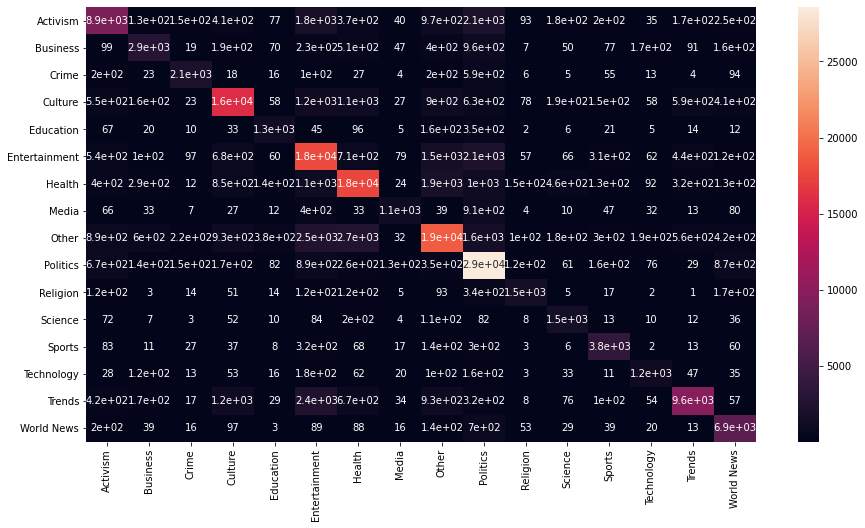

In [231]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm_array, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,8))

sns.heatmap(df_cm, annot=True)